In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
zoo = pd.read_csv('D:/study docs/Excel R/Data science/assignment/KNN/Datasets/Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [6]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


<AxesSubplot:ylabel='type'>

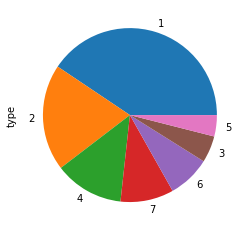

In [8]:
zoo['type'].value_counts().plot(kind = 'pie')

In [9]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<BarContainer object of 101 artists>

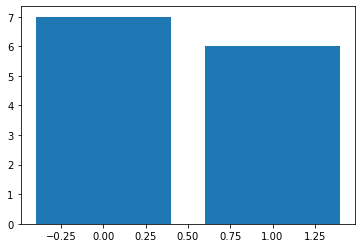

In [10]:
plt.bar(zoo.hair,zoo.type)

<AxesSubplot:xlabel='predator', ylabel='type'>

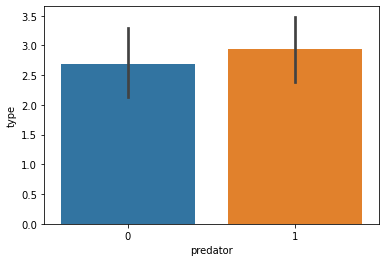

In [11]:
sns.barplot(x = 'predator',y = 'type',data = zoo)

In [12]:
zoo1 = zoo.rename({'animal name': 'animalname'},axis = 1)

In [13]:
zoo2 = zoo1.drop(['animalname'],axis = 1)

In [14]:
zoo2

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
x = zoo2.iloc[:,:-1].values
y = zoo2.iloc[:,-1].values

In [16]:
test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(x, y)

In [17]:
set_printoptions(precision=2)
print(fit.scores_)
features = fit.transform(x)

[48.83 81.   37.42 60.   49.21 29.87  5.43 37.06 18.   17.34 17.59 62.55
 81.17 16.88  4.19 20.98]


In [18]:
zoo3 = zoo2.drop(['predator','tail','legs'],axis = 1)
zoo3

,hair,feathers,eggs,milk,airborne,aquatic,toothed,backbone,breathes,venomous,fins,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,0,0,0,1,1
1,1,0,0,1,0,0,1,1,1,0,0,0,1,1
2,0,0,1,0,0,1,1,1,0,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,0,0,0,1,1
4,1,0,0,1,0,0,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,1,1,1,0,0,0,1,1
97,1,0,1,0,1,0,0,0,1,1,0,0,0,6
98,1,0,0,1,0,0,1,1,1,0,0,0,1,1
99,0,0,1,0,0,0,0,0,1,0,0,0,0,7


In [19]:
X = zoo2.iloc[:,:-1].values
Y = zoo2.iloc[:,-1].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [21]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [22]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.975
{'n_neighbors': 1}


In [24]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred = knn_model.predict(x_test)

In [26]:
acc = accuracy_score(y_test, y_pred) * 100
acc

100.0